Assignment 02: Regression

Name: Yash Wadhwa
NUID: 002778382

1. Linear Regression:
Apply linear regression on the Boston Housing dataset with "MV" as the dependent variable. Arrive at the final dataset with reduced number of columns, utilizing p-value, correlation coefficient, and multiple R-squared statistics. Use whatever libraries are appropriate when coding in Python. Can you run the same in Excel using a data analysis function and the prepared dataset?

In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_bos=pd.read_excel("/Users/wadhwa/Desktop/dsem/Assignment-2/boston housing.xlsx") 
df_bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


In [4]:
df_bos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
pd.options.display.float_format = '{:.4f}'.format
df_corr=df_bos.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


The Pearson Correlation Coefficient of CRIM is -0.3883046116575092  with a P-value = 1.1739862423663313e-19


(0.0, 53.98296907334348)

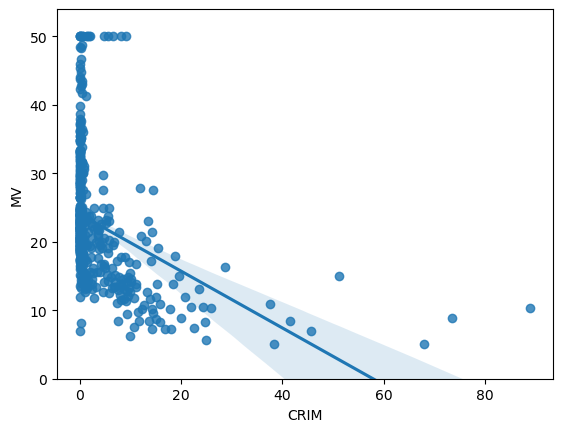

In [6]:
pearson_coef, p_value = stats.pearsonr(df_bos['CRIM'], df_bos['MV'])
print("The Pearson Correlation Coefficient of CRIM is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="CRIM", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of ZN is 0.36044534463752975  with a P-value = 5.713581510452926e-17


(0.0, 52.25)

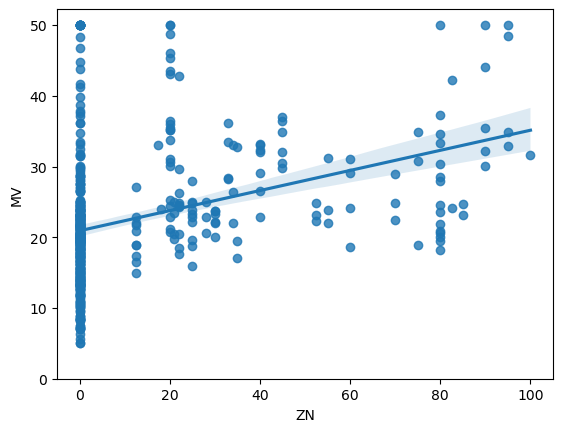

In [7]:
pearson_coef, p_value = stats.pearsonr(df_bos['ZN'], df_bos['MV'])
print("The Pearson Correlation Coefficient of ZN is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="ZN", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of INDUS is -0.4837251712814327  with a P-value = 4.90024231935327e-31


(0.0, 52.25)

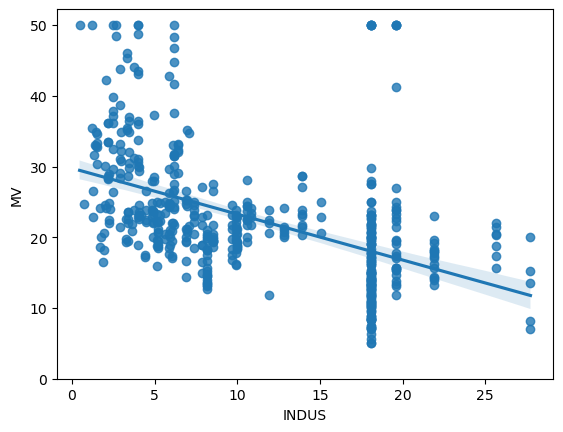

In [8]:
pearson_coef, p_value = stats.pearsonr(df_bos['INDUS'], df_bos['MV'])
print("The Pearson Correlation Coefficient of INDUS is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="INDUS", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of CHAS is 0.17526017775291908  with a P-value = 7.390622770248226e-05


(0.0, 52.25)

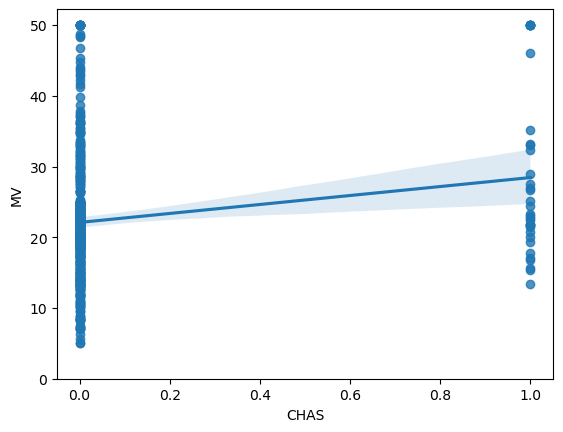

In [9]:
pearson_coef, p_value = stats.pearsonr(df_bos['CHAS'], df_bos['MV'])
print("The Pearson Correlation Coefficient of CHAS is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="CHAS", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of NOX is -0.42732077636837595  with a P-value = 7.065034084652824e-24


(0.0, 52.25)

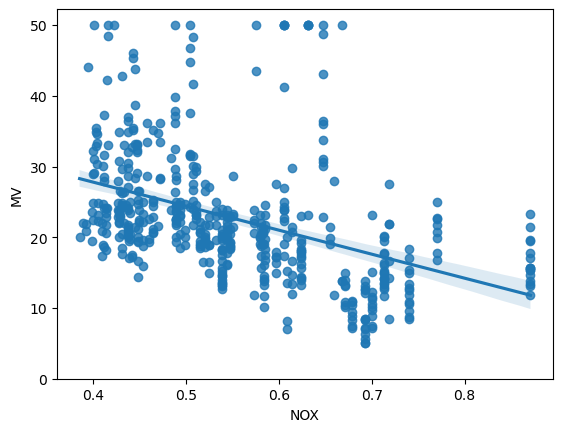

In [10]:
pearson_coef, p_value = stats.pearsonr(df_bos['NOX'], df_bos['MV'])
print("The Pearson Correlation Coefficient of NOX is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="NOX", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of RM is 0.6953599371272667  with a P-value = 2.4872456897498975e-74


(0.0, 52.79182983015131)

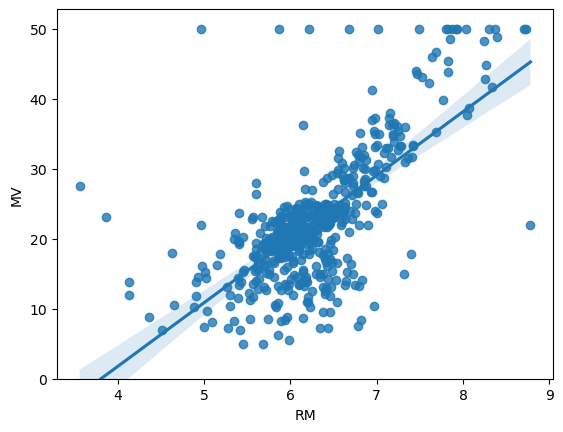

In [11]:
pearson_coef, p_value = stats.pearsonr(df_bos['RM'], df_bos['MV'])
print("The Pearson Correlation Coefficient of RM is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="RM", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of AGE is -0.37695456714288694  with a P-value = 1.5699814570835872e-18


(0.0, 52.25)

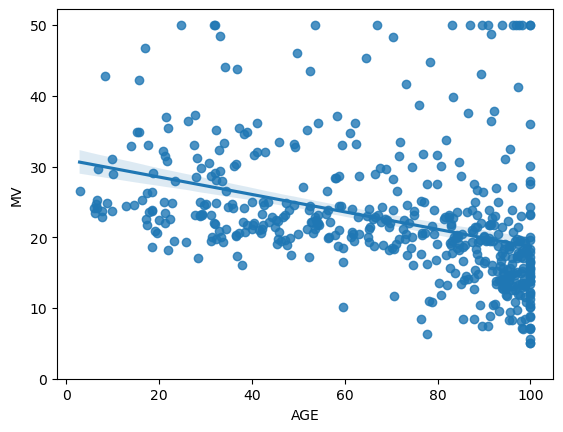

In [12]:
pearson_coef, p_value = stats.pearsonr(df_bos['AGE'], df_bos['MV'])
print("The Pearson Correlation Coefficient of AGE is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="AGE", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of DIS is 0.24992873873512156  with a P-value = 1.206610952424503e-08


(0.0, 52.25)

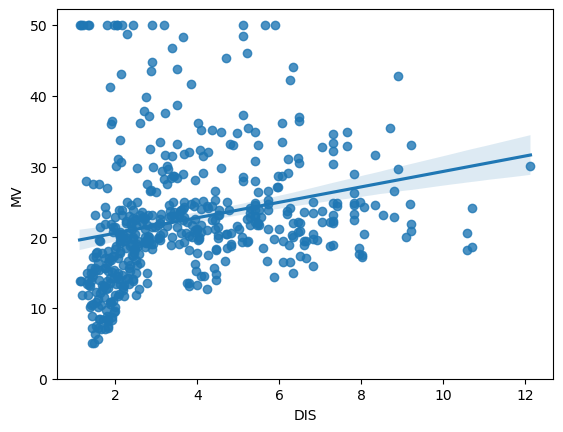

In [13]:
pearson_coef, p_value = stats.pearsonr(df_bos['DIS'], df_bos['MV'])
print("The Pearson Correlation Coefficient of DIS is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="DIS", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of RAD is -0.3816262315669176  with a P-value = 5.465931415837959e-19


(0.0, 52.25)

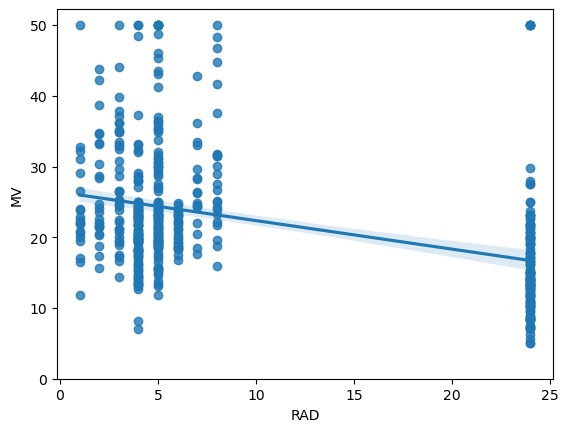

In [14]:
pearson_coef, p_value = stats.pearsonr(df_bos['RAD'], df_bos['MV'])
print("The Pearson Correlation Coefficient of RAD is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="RAD", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of TAX is -0.46853593528654536  with a P-value = 5.637730675534297e-29


(0.0, 52.25)

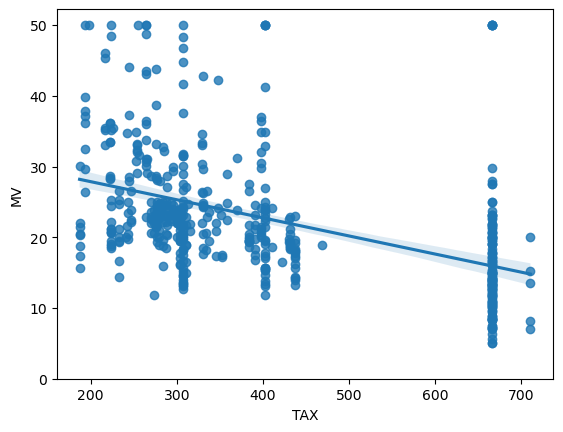

In [15]:
pearson_coef, p_value = stats.pearsonr(df_bos['TAX'], df_bos['MV'])
print("The Pearson Correlation Coefficient of TAX is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="TAX", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of PT is -0.5077867038116085  with a P-value = 1.6094992789029905e-34


(0.0, 52.25)

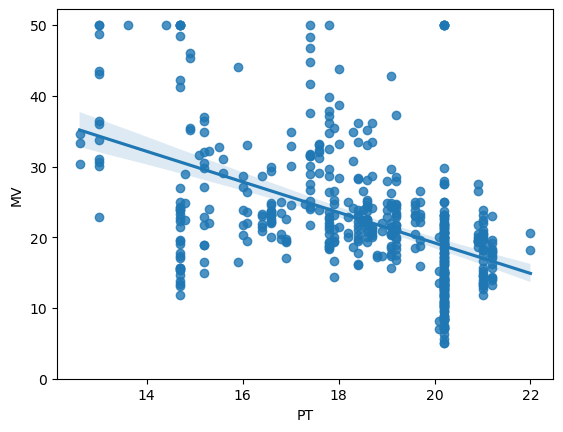

In [16]:
pearson_coef, p_value = stats.pearsonr(df_bos['PT'], df_bos['MV'])
print("The Pearson Correlation Coefficient of PT is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="PT", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of B is 0.33346082268341665  with a P-value = 1.3181119682130765e-14


(0.0, 52.25)

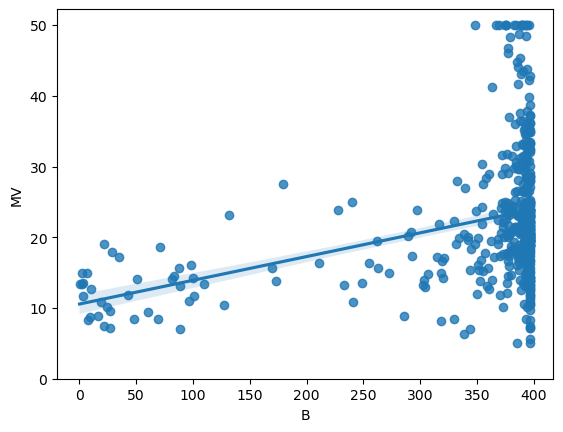

In [17]:
pearson_coef, p_value = stats.pearsonr(df_bos['B'], df_bos['MV'])
print("The Pearson Correlation Coefficient of B is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="B", y="MV", data=df_bos)
plt.ylim(0,)

The Pearson Correlation Coefficient of LSTAT is -0.7376627294671609  with a P-value = 5.081089725050567e-88


(0.0, 52.69658460670691)

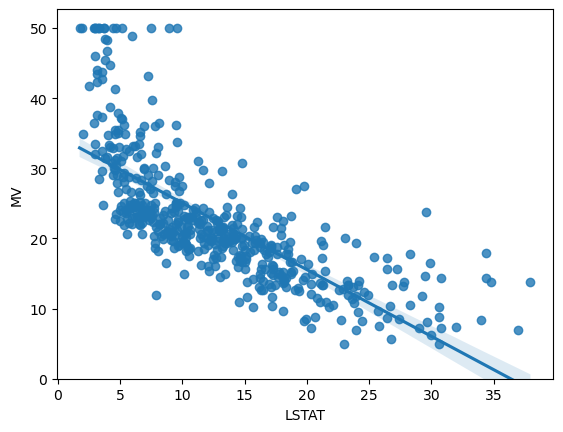

In [18]:
pearson_coef, p_value = stats.pearsonr(df_bos['LSTAT'], df_bos['MV'])
print("The Pearson Correlation Coefficient of LSTAT is", pearson_coef, " with a P-value =", p_value)  
sns.regplot(x="LSTAT", y="MV", data=df_bos)
plt.ylim(0,)

In [19]:
Corr_result=[['CRIM',-0.3883046116575091,1.1739862423663313e-19], ['ZN',0.36044534463752853,5.713581510454592e-17], ['INDUS',-0.4837251712814335,4.900242319351878e-31], ['CHAS',0.17526017775291866,7.390622770248423e-05], ['NOX',-0.4273207763683765,7.06503408465202e-24], ['RM',0.695359937127267,2.4872456897496148e-74], ['AGE',-0.37695456714288655,1.5699814570835983e-18], ['DIS',0.24992873873512159,1.206610952424503e-08], ['RAD',-0.38162623156691733,5.46593141583858e-19], ['TAX',-0.46853593528654547,5.637730675534297e-29], ['PT',-0.5077867038116088,1.609499278902899e-34], ['B',0.3334608226834166,1.3181119682130765e-14], ['LSTAT',-0.7376627294671607,5.081089725051722e-88]]
Pearson_Pvalue = pd.DataFrame(Corr_result, columns = ['Predictors', 'pearson_Correlation','P-value'])
pd.options.display.float_format = '{:.5f}'.format
Pearson_Pvalue 

,Predictors,pearson_Correlation,P-value
0,CRIM,-0.38830,0.00000
1,ZN,0.36045,0.00000
2,INDUS,-0.48373,0.00000
3,CHAS,0.17526,0.00007
4,NOX,-0.42732,0.00000
5,RM,0.69536,0.00000
6,AGE,-0.37695,0.00000
7,DIS,0.24993,0.00000
8,RAD,-0.38163,0.00000
9,TAX,-0.46854,0.00000


In [20]:
#to detect multi-collinearity through VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant 
X = add_constant(df_bos)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const   645.97792
TAX       9.20554
RAD       7.80820
NOX       4.58692
DIS       4.39601
INDUS     3.99250
MV        3.85568
LSTAT     3.58158
AGE       3.10084
ZN        2.35219
RM        2.26037
PT        1.99302
CRIM      1.83154
B         1.38146
CHAS      1.09522
dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_bos.drop("MV", axis=1), df_bos['MV'], test_size = 0.2,random_state=100)
from sklearn.linear_model import LinearRegression
my_model = LinearRegression(normalize=True) 
my_model.fit(X_train, Y_train)               
predictions = my_model.predict(X_test)  
pd.DataFrame({'actual value': Y_test, 'predictions':predictions}).sample(5) 

/Users/wadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,actual value,predictions
6,22.90000,22.85417
401,7.20000,18.01097
266,30.70000,31.26792
111,22.80000,26.21920
409,27.50000,19.76594


In [22]:
my_model.score(X_test, Y_test)    

0.7555033080079607

In [23]:
my_model.coef_

array([-8.14896368e-02,  4.80407771e-02, -5.47146439e-03,  3.06260583e+00,
       -1.61368842e+01,  3.67245042e+00, -8.51525308e-03, -1.51740849e+00,
        2.87271026e-01, -1.21207584e-02, -9.24160797e-01,  9.53460840e-03,
       -4.85895573e-01])

In [24]:
my_model.intercept_

36.33377325955092

Text(0, 0.5, 'Predicted_Y')

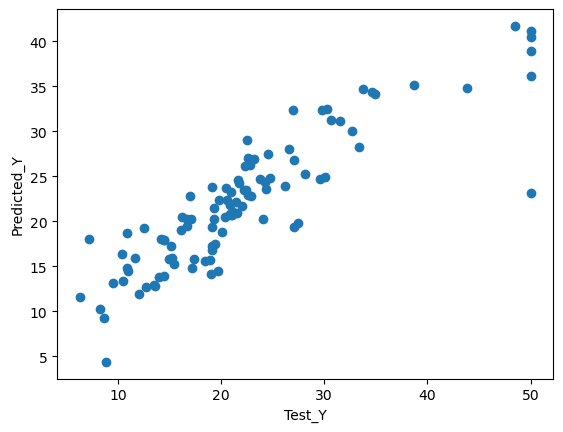

In [25]:
plt.scatter(Y_test,predictions)
plt.xlabel('Test_Y')
plt.ylabel('Predicted_Y')

In [26]:
X_train = sm.add_constant(X_train) 
my_model = sm.OLS(Y_train, X_train)
result = my_model.fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.67
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          2.38e-103
Time:                        12:38:56   Log-Likelihood:                -1194.4
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3338      5.723      6.349      0.0

In [27]:
from sklearn.metrics import r2_score
predictions = result.predict(sm.add_constant(X_test))
r2_score(Y_test, predictions)

0.7555033080079618

In [28]:
X_train = X_train.drop("INDUS", axis=1)
updated_model_result = sm.OLS(Y_train, X_train).fit()
print(updated_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     89.79
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          2.47e-104
Time:                        12:38:57   Log-Likelihood:                -1194.4
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     391   BIC:                             2467.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3617      5.704      6.375      0.0

In [29]:
from sklearn.metrics import r2_score
X_test = X_test.drop("INDUS", axis=1)
predictions = updated_model_result.predict(sm.add_constant(X_test))
r2_score(Y_test, predictions)

0.7556711805719245

Text(0, 0.5, 'Predicted_Y')

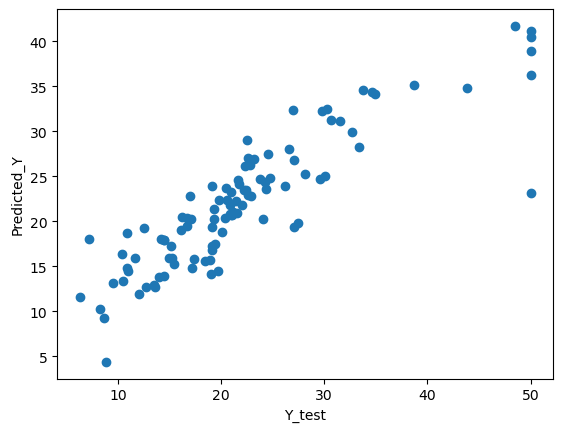

In [30]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted_Y')

In [31]:
X_train = X_train.drop("CHAS", axis=1)
updated_model_result1 = sm.OLS(Y_train, X_train).fit()
print(updated_model_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     94.44
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          6.15e-103
Time:                        12:38:58   Log-Likelihood:                -1200.2
No. Observations:                 404   AIC:                             2424.
Df Residuals:                     392   BIC:                             2472.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6527      5.778      6.344      0.0

In [32]:
X_test = X_test.drop("CHAS", axis=1)
predictions = updated_model_result1.predict(sm.add_constant(X_test))
r2_score(Y_test, predictions)

0.7585974639644776

In [33]:
X_train = X_train.drop("AGE", axis=1)
updated_model_result1 = sm.OLS(Y_train, X_train).fit()
print(updated_model_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          6.49e-104
Time:                        12:38:58   Log-Likelihood:                -1200.3
No. Observations:                 404   AIC:                             2423.
Df Residuals:                     393   BIC:                             2467.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8469      5.756      6.402      0.0

In [34]:
X_test = X_test.drop("AGE", axis=1)
predictions = updated_model_result1.predict(sm.add_constant(X_test))
r2_score(Y_test, predictions)

0.7601543700031923

2. Logistic Regression:
Apply logistic regression on the Loan dataset with "Decision" as the dependent variable. Do the necessary one-hot encoding for the categorical variables and discard the irrelevant variables. Use whatever libraries are appropriate when coding in Python.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline 

In [36]:
df_loan = pd.read_excel('/Users/wadhwa/Desktop/dsem/Assignment-2/loan.xlsx')
df_loan

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.75000,0.58500,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.67000,10.00000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.83000,15.00000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.67000,2.54000,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.25000,13.00000,owner,given,driver,governmen,0,0,f,given,228,0,reject
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.17000,2.75000,owner,given,guard_etc,self_empl,2,0,t,given,232,200,reject
425,F,22.25000,1.25000,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,reject
426,M,23.33000,1.50000,owner,given,creative_,governmen,1,0,f,given,422,200,accept
427,M,21.00000,4.79000,rent,not_given,productio,private_s,2,1,t,given,80,300,accept


In [37]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB


In [38]:
df_loan['Decision'] = df_loan['Decision'].map({'accept': 1, 'reject': 0})
df_loan

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.75000,0.58500,owner,given,unemploye,unemploye,0,0,f,given,145,0,0
1,M,19.67000,10.00000,rent,not_given,labourer,governmen,0,0,t,given,140,0,0
2,F,52.83000,15.00000,owner,given,creative_,private_s,5,14,f,given,0,2200,1
3,M,22.67000,2.54000,rent,not_given,creative_,governmen,2,0,f,given,0,0,1
4,M,29.25000,13.00000,owner,given,driver,governmen,0,0,f,given,228,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.17000,2.75000,owner,given,guard_etc,self_empl,2,0,t,given,232,200,0
425,F,22.25000,1.25000,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,0
426,M,23.33000,1.50000,owner,given,creative_,governmen,1,0,f,given,422,200,1
427,M,21.00000,4.79000,rent,not_given,productio,private_s,2,1,t,given,80,300,1


In [39]:
lbl_enc = LabelEncoder()
df_loan['Sex'] = lbl_enc.fit_transform(df_loan['Sex'])
df_loan['Res_status'] = lbl_enc.fit_transform(df_loan['Res_status'])
df_loan['Telephone'] = lbl_enc.fit_transform(df_loan['Telephone'])
df_loan['Occupation'] = lbl_enc.fit_transform(df_loan['Occupation'])
df_loan['Job_status'] = lbl_enc.fit_transform(df_loan['Job_status'])
df_loan['Liab_ref'] = lbl_enc.fit_transform(df_loan['Liab_ref'])
df_loan['Acc_ref'] = lbl_enc.fit_transform(df_loan['Acc_ref'])
df_loan

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,1,50.75000,0.58500,0,0,11,6,0,0,0,0,145,0,0
1,1,19.67000,10.00000,1,1,4,0,0,0,1,0,140,0,0
2,0,52.83000,15.00000,0,0,0,2,5,14,0,0,0,2200,1
3,1,22.67000,2.54000,1,1,0,0,2,0,0,0,0,0,1
4,1,29.25000,13.00000,0,0,1,0,0,0,0,0,228,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,1,34.17000,2.75000,0,0,3,4,2,0,1,0,232,200,0
425,0,22.25000,1.25000,1,1,11,6,3,0,0,0,280,0,0
426,1,23.33000,1.50000,0,0,0,0,1,0,0,0,422,200,1
427,1,21.00000,4.79000,1,1,7,2,2,1,1,0,80,300,1


In [40]:
y= df_loan['Decision'] 
X= df_loan.drop(['Decision'], axis=1)

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Decision   No. Observations:                  300
Model:                            GLM   Df Residuals:                      287
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.60
Date:                Mon, 06 Feb 2023   Deviance:                       273.19
Time:                        12:39:01   Pearson chi2:                     416.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3673
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.2583      0.570     -2.206      0.027      -2.376      -0.140
Sex                 0.4329      0.330      1.312      0.190      -0.214       1.079
Age                 0.0048      0.014      0.335      0.738      -0.023       0.033
Time_at_address     0.0020      0.034      0.059      0.953      -0.064       0.068
Res_status         -0.2808      0.182     -1.541      0.123      -0.638       0.076
Telephone          -0.2808      0.182     -1.541      0.123      -0.638       0.076
Occupation          0.0509      0.047      1.089      0.276      -0.041       0.143
Job_status         -0.2432      0.118     -2.058      0.040      -0.475      -0.012
Time_employed       0.2678      0.083      3.232      0.001       0.105       0.430
Time_bank           0.4098      0.078      5.241      0.000       0.257       0.563
Liab_ref           -0.1098      0.321     -0.342      0.733      -0.740       0.520
Acc_ref             0.1784      0.621      0.287      0.774      -1.040       1.397
Home_Expn          -0.0017      0.001     -1.458      0.145      -0.004       0.001
Balance             0.0004      0.000      2.681      0.007       0.000       0.001
===================================================================================
"""

<AxesSubplot:>

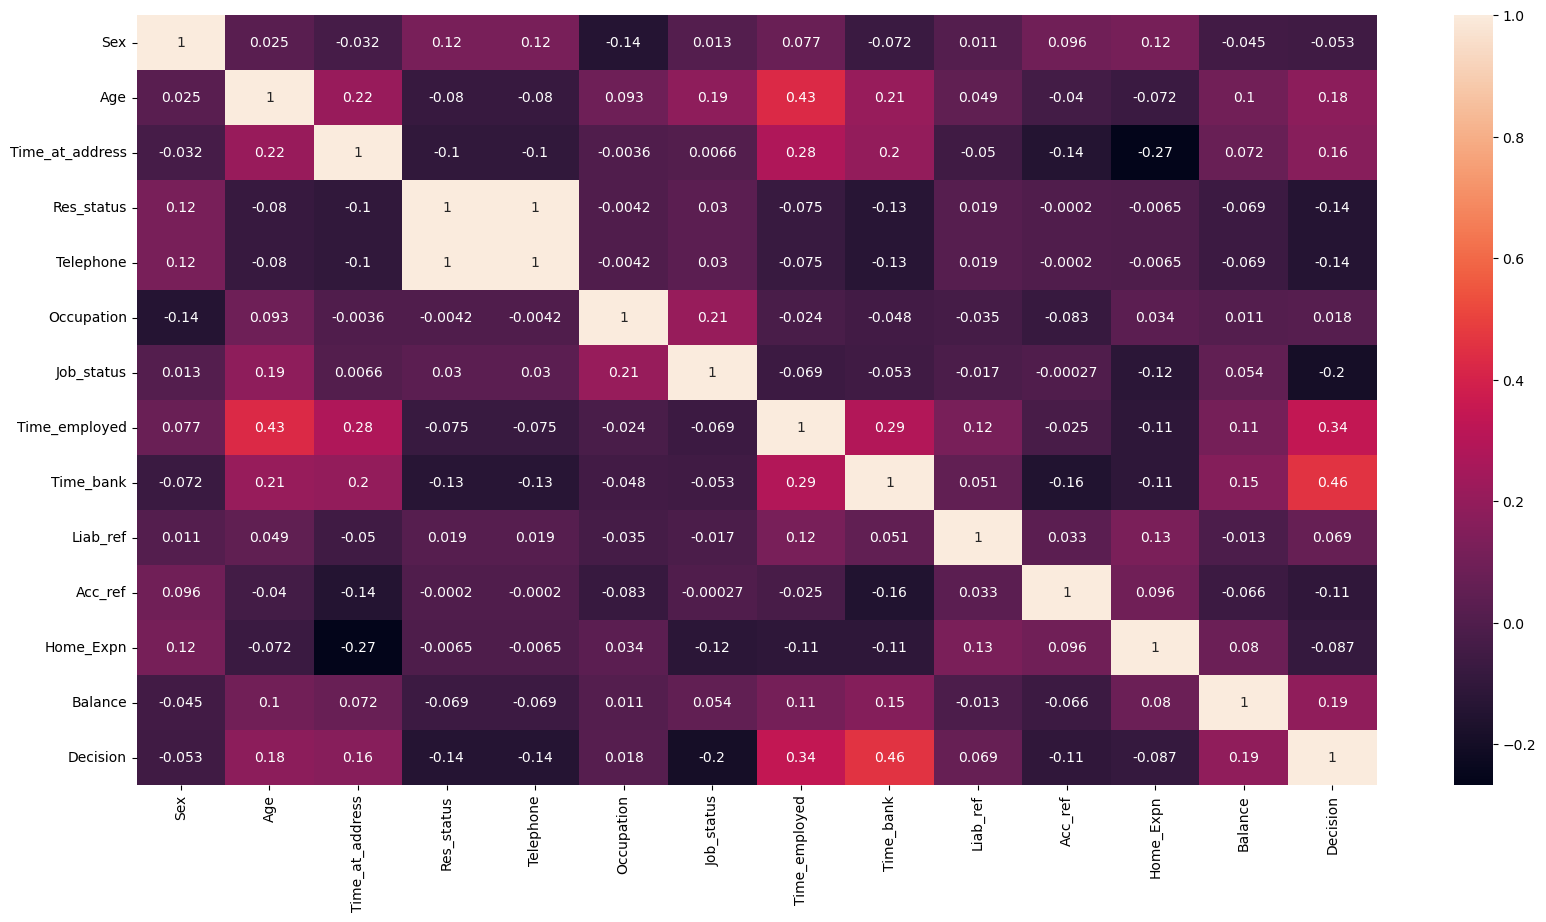

In [41]:
plt.figure(figsize = (20,10))       
sns.heatmap(df_loan.corr(),annot = True)

In [42]:
def vif_calc(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [43]:
vif_calc(input_data=df_loan.drop(['Sex','Occupation'], axis=1), dependent_col='Decision')

/var/folders/cp/llttj8tn31qg0wsrjzjyptz40000gn/T/ipykernel_34883/3142286907.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
/var/folders/cp/llttj8tn31qg0wsrjzjyptz40000gn/T/ipykernel_34883/3142286907.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


,Var,Vif
2,Res_status,inf
3,Telephone,inf
0,Age,6.69000
4,Job_status,2.95000
9,Home_Expn,2.35000
1,Time_at_address,2.16000
7,Liab_ref,1.86000
5,Time_employed,1.81000
6,Time_bank,1.56000
8,Acc_ref,1.12000


In [44]:
cols = ['Job_status','Home_Expn','Time_at_address','Liab_ref','Time_employed','Time_bank','Acc_ref','Balance']

In [45]:
model2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Decision   No. Observations:                  300
Model:                            GLM   Df Residuals:                      291
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.03
Date:                Mon, 06 Feb 2023   Deviance:                       278.07
Time:                        12:39:03   Pearson chi2:                     370.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3570
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8594      0.423     -2.033      0.042      -1.688      -0.031
Job_status         -0.2044      0.106     -1.919      0.055      -0.413       0.004
Home_Expn          -0.0014      0.001     -1.181      0.238      -0.004       0.001
Time_at_address     0.0110      0.033      0.334      0.738      -0.054       0.076
Liab_ref           -0.1812      0.314     -0.577      0.564      -0.796       0.434
Time_employed       0.2735      0.076      3.583      0.000       0.124       0.423
Time_bank           0.3983      0.076      5.216      0.000       0.249       0.548
Acc_ref             0.1416      0.620      0.228      0.819      -1.073       1.356
Balance             0.0004      0.000      2.590      0.010    9.36e-05       0.001
===================================================================================
"""

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/wadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
pred = log_reg.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        67
           1       0.84      0.68      0.75        62

    accuracy                           0.78       129
   macro avg       0.79      0.78      0.78       129
weighted avg       0.79      0.78      0.78       129

